# 워드클라우드 (영문)

텍스트 마이닝 분야에서 사용되는 시각화 방법으로 단어의 등장 빈도를 표현한다.

`wordcloud` 패키지 설치가 필요하다.

## 실습용 파일 다운로드

아래 URL에 다운로드 받은 후 `D-05-(5) 워드클라우드` 폴더 안에 압축을 해제한다.

> https://data.hossam.kr/tmdata/wordcloud.zip

## #01. 준비작업

### [1] 패키치 참조

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np

from IPython.display import Image, display

from wordcloud import WordCloud

from wordcloud import STOPWORDS

from PIL import Image as Img


### [2] 데이터 가져오기

텍스트 데이터가 필요하므로 `txt` 파일을 읽어온다.

In [5]:
with open('이상한나라의앨리스.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    print(text)

Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net


Title: Alice's Adventures in Wonderland
       Illustrated by Arthur Rackham. With a Proem by Austin Dobson

Author: Lewis Carroll

Illustrator: Arthur Rackham

Release Date: May 19, 2009 [EBook #28885]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***




Produced by Jana Srna, Emmy and the Online Distributed
Proofreading Team at http://www.pgdp.net (This file was
produced from images generously made available by the
University of Florida Digital Collections.)











ALICE'S ADVENTURES IN WONDERLAND

[Illustration: "Alice"]

[Illustration:

          ALICE'S·ADVENTURES
          IN·WONDERLAND
          BY·LEWIS·CAR

## #02. 기본 사용 방법

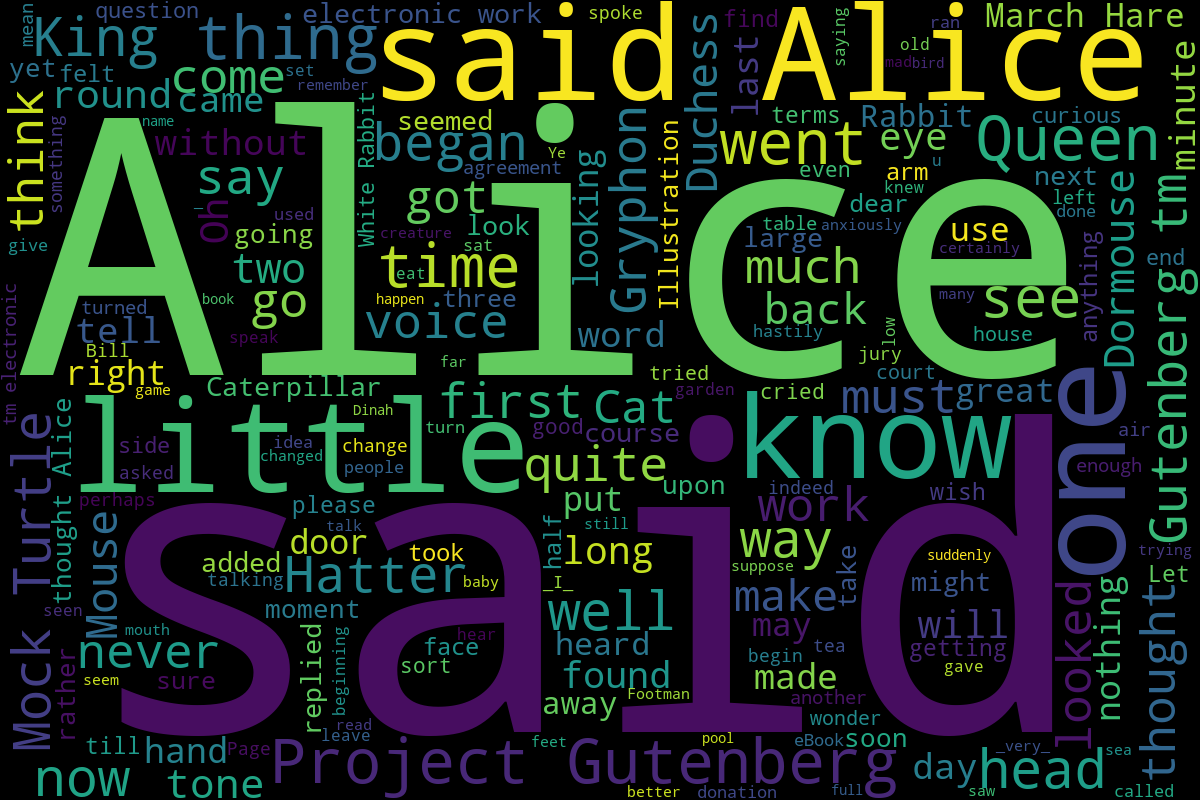

In [7]:
wc = WordCloud(width=1200, height=800)
wc.generate(text)
#print(wc.words_)
wc.to_file('simple.png')
display(Image(filename='simple.png'))

## #03. WordCloud 객체의 옵션

### [1] 금지어 설정

In [8]:
ignore = set(STOPWORDS)
ignore.add('said')
ignore.add('Alice')

### [2] 마스크 이미지 설정

In [9]:
img = Img.open('앨리스배경.png')
iarr = np.array(img)
iarr

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

### [3] 워드 클라우드 확인

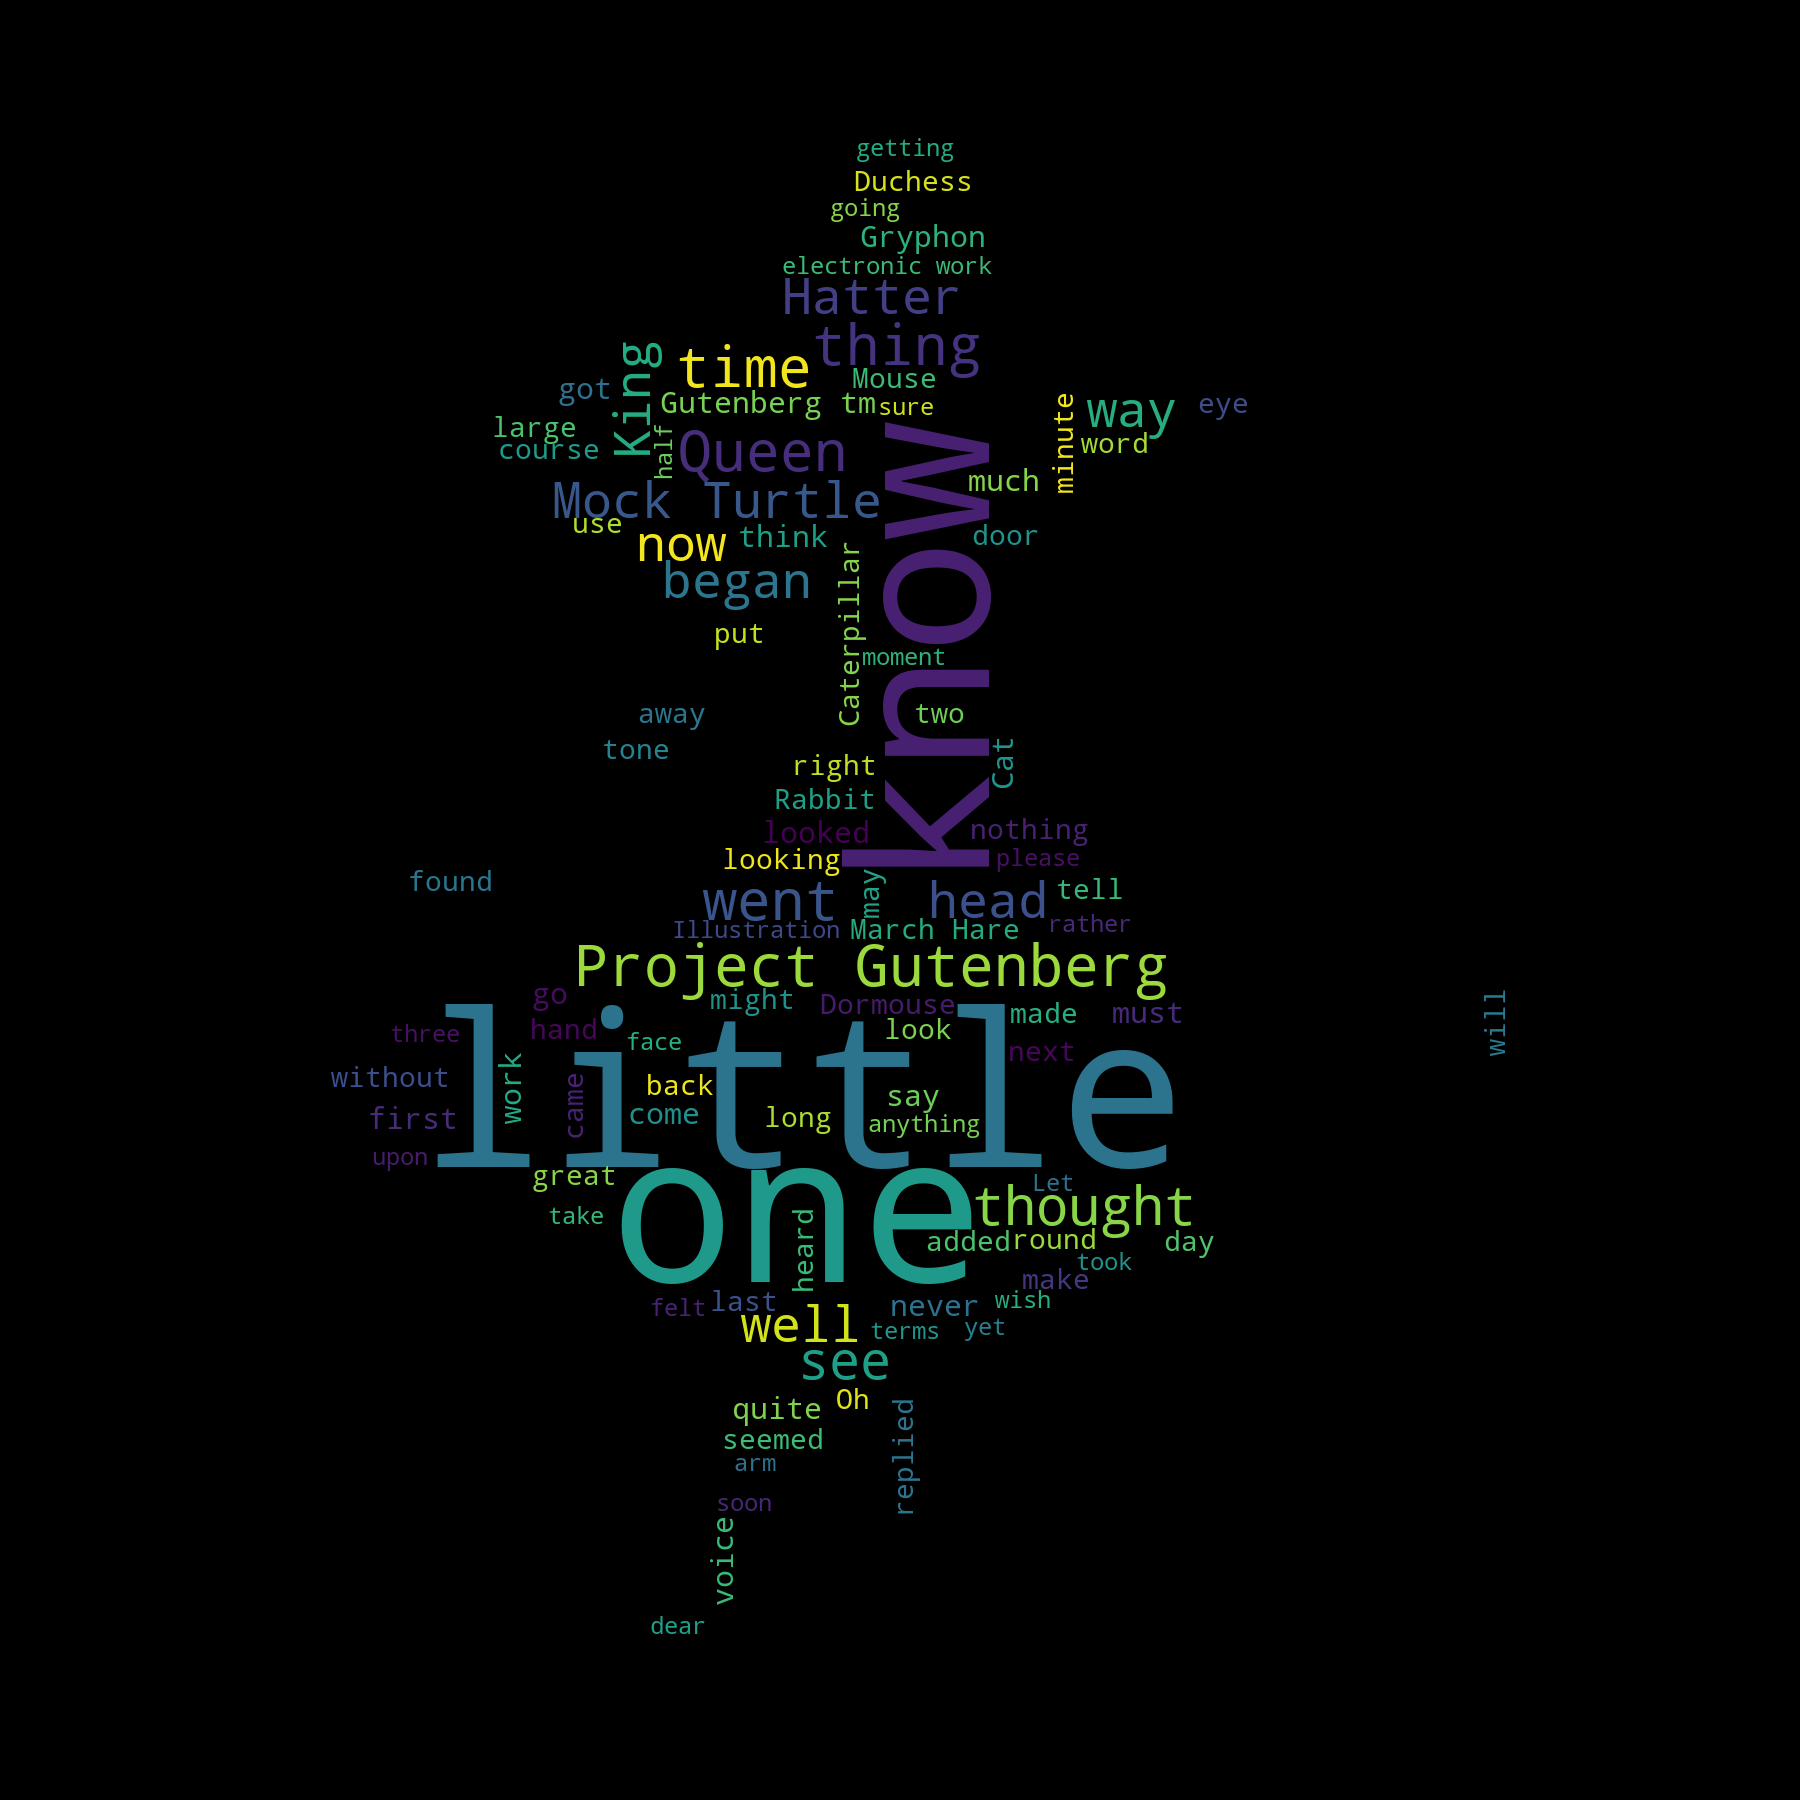

In [10]:
wc = WordCloud(width=600, height=1200,
               max_font_size=150,
               scale = 2.0,
               max_words = 100, 
               stopwords = ignore,
               mask = iarr
               )

wc.generate(text)
wc.to_file('options.png')
display(Image(filename='options.png'))

## #03. 색상 설정

### [1] 글자색상을 반환하는 함수

함수 이름은 상관 없지만 콜백함수로서 사용되므로 파라미터는 사전에 API가 정해놓은 규칙에 따라 정의해야 한다.

이 함수는 Wordcloud 객체에 의해서 단어수만큼 호출 당하는 함수

In [11]:
def get_color(word, font_size, position, orientation, random_state=None, **kwargs):
    random_state.seed()
    a = random_state.randint(30,90)
    b = random_state.randint(30,90)
    color = 'hsl(270,%d%%,%d%%)' % (a,b)
    return color

### 워드클라우드 생성

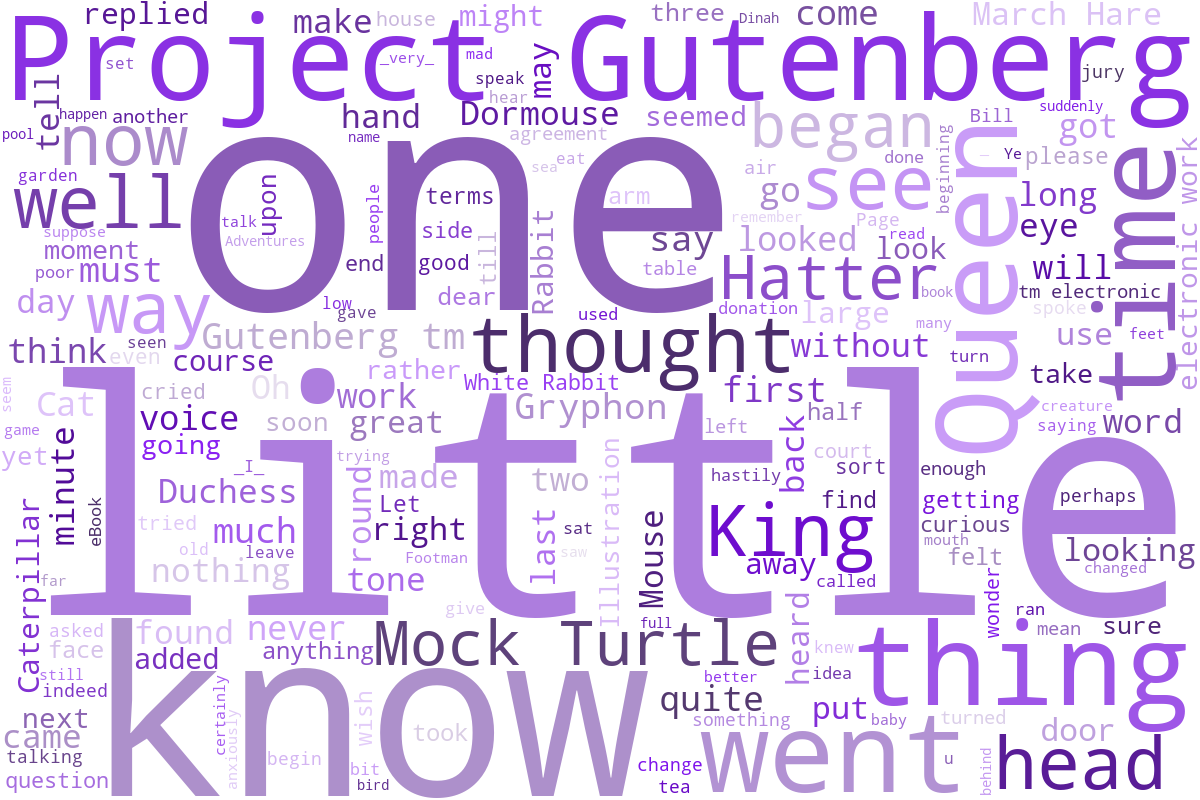

In [15]:
wc = WordCloud(width=1200, height=800, stopwords=ignore, background_color='#ffffff')
wc.generate(text)

wc.recolor(color_func=get_color, random_state=True)

wc.to_file('colors.png')
display(Image(filename='colors.png'))